In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns


#plt.style.use('ggplot')
#pd.set_option('display.max_columns', 200) #It Help us to display it for example in the head to whatch every column, just in the exploration

In [6]:
# encoding='ISO-8859-1, we need to use another encodig way, why
df_pep = pd.read_csv('C:\\Users\\Edgar\\OneDrive\\Escritorio\\Data_and_ML\\Data_Analyst\\EDA\\Caso Práctico Financial Planning Analyst - MBS Cockpit.csv',encoding='ISO-8859-1')


In [8]:
df_pep.shape

(21745, 11)

In [10]:
df_pep.columns

# 'Brand Cockpit - Level 1' - General
# 'Brand Cockpit - Level 2' - Division
# 'Platform'                - Camapana de marqueting
# 'Global / Local',         - Si es de forma regional o global 
# 'MU'                      - Unidad de mercado / pais
# 'Category'                - Frituras / Bebidas
# 'Month'                   - 12 Jan - Dec
# 'Year'                    - 2017 -
# 'Data'                    - DESCONOCIDO, NO LOGRE DARLE UN SIGNIFICADO -
# 'Scenario'                - 4
# 'Value'                   - Resultado

Index(['Brand Cockpit - Level 1', 'Brand Cockpit - Level 2', 'Platform',
       'Global / Local', 'MU', 'Category', 'Month', 'Year', 'Data', 'Scenario',
       'Value'],
      dtype='object')

In [12]:
df_pep.head(3)

,Brand Cockpit - Level 1,Brand Cockpit - Level 2,Platform,Global / Local,MU,Category,Month,Year,Data,Scenario,Value
0,Lay's,PC Max,Build Lays Powerbrand,Global,France,Snacks,Oct,2017,NR,LY,"-908,281.30"
1,Lay's,PC Max,Build Lays Powerbrand,Global,France,Snacks,Nov,2017,NR,Actual,"-889,898.70"
2,Chipsy,Max,Build Lays Powerbrand,Local,Germany,Snacks,Sep,2017,NR,Fcst,"-577,935.10"


In [11]:
df_pep.dtypes

Brand Cockpit - Level 1    object
Brand Cockpit - Level 2    object
Platform                   object
Global / Local             object
MU                         object
Category                   object
Month                      object
Year                        int64
Data                       object
Scenario                   object
Value                      object
dtype: object

In [13]:
df_pep.describe() # Solo es sobre el a;o 2017, entonces no hay mucho que meterle en a;os

,Year
count,21745.0
mean,2017.0
std,0.0
min,2017.0
25%,2017.0
50%,2017.0
75%,2017.0
max,2017.0


In [19]:
df_pep.Month.unique()
#df_pep.Year.unique()

<DatetimeArray>
['2017-10-01 00:00:00', '2017-11-01 00:00:00', '2017-09-01 00:00:00',
 '2017-04-01 00:00:00', '2017-02-01 00:00:00', '2017-03-01 00:00:00',
 '2017-01-01 00:00:00', '2017-12-01 00:00:00', '2017-05-01 00:00:00',
 '2017-08-01 00:00:00', '2017-07-01 00:00:00', '2017-06-01 00:00:00']
Length: 12, dtype: datetime64[ns]

In [15]:
#Cambio de formato de el formato de tiempo
df_pep['Month'] = pd.to_datetime(df_pep['Month'] + '-2017', format='%b-%Y')


In [16]:
df_pep.dtypes

Brand Cockpit - Level 1            object
Brand Cockpit - Level 2            object
Platform                           object
Global / Local                     object
MU                                 object
Category                           object
Month                      datetime64[ns]
Year                                int64
Data                               object
Scenario                           object
Value                              object
dtype: object

In [23]:
#To avoid some problems lets gonna add _ inetead of spaces
df_pep_new = df_pep.rename(columns={
    'Brand Cockpit - Level 1': 'Brand_Cockpit_L1', 
    'Brand Cockpit - Level 2': 'Brand_Cockpit_L2',
    'Global / Local' : 'Global/Local', 
    'MU': 'Marquet_Unit'
})

In [24]:
df_pep_new.columns

Index(['Brand_Cockpit_L1', 'Brand_Cockpit_L2', 'Platform', 'Global/Local',
       'Marquet_Unit', 'Category', 'Month', 'Year', 'Data', 'Scenario',
       'Value'],
      dtype='object')

# Searching for NaN or NULL values

In [26]:
#Supuestamente no tenemos valures NULL O NaN
df_pep_new.isna().sum()
df_pep_new.isnull().sum()

Brand_Cockpit_L1    0
Brand_Cockpit_L2    0
Platform            0
Global/Local        0
Marquet_Unit        0
Category            0
Month               0
Year                0
Data                0
Scenario            0
Value               0
dtype: int64

In [28]:
#Tampoco hay duplicados, 
df_pep_new.duplicated().sum()

0

## Reviwe abouth each column

### Brand_Cockpit_L1

29
["Lay's" 'Chipsy' 'Balance' 'Quaker' 'Lipton' 'Star' 'Cheetos' 'Krax'
 'Other Global' 'Other Energy' 'Other CSD' '7up' 'Pepsi' 'Mountain Dew'
 'Sweet' 'Mirinda' 'Chipita' 'Twistos' 'Doritos' 'Sunbites' 'Other Water'
 'Mr. Snaki' 'Pardon' 'Ruffles' 'GUD' 'Other Juice' 'Tasty' 'Yedigun'
 'Clipsy']


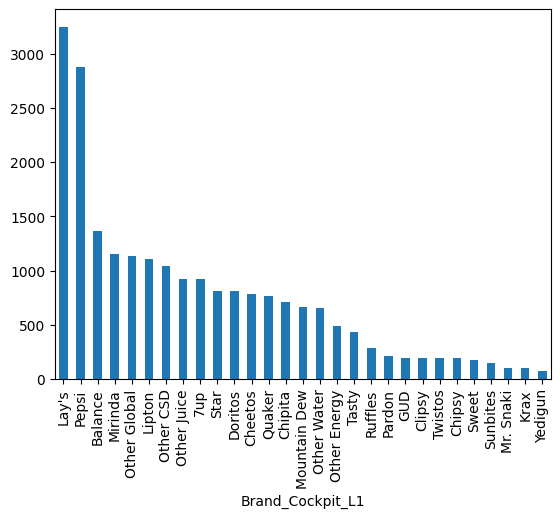

In [40]:
counts_BCL1 = df_pep_new['Brand_Cockpit_L1'].value_counts()
print(df_pep_new['Brand_Cockpit_L1'].nunique())
print(df_pep_new['Brand_Cockpit_L1'].unique())


ax = counts_BCL1.plot(kind = 'bar')

# Hay varios que dicen otros que deberiamos hacer con ellos para la presentacion

In [41]:
print(df_pep_new.describe(include='all'))


       Brand_Cockpit_L1   Brand_Cockpit_L2 Platform Global/Local Marquet_Unit  \
count             21745              21745    21745        21745        21745   
unique               29                 80        9            2            9   
top               Lay's  Extruded / Pellet    Other       Global        Spain   
freq               3250               1070     5601        13905         4892   
mean                NaN                NaN      NaN          NaN          NaN   
min                 NaN                NaN      NaN          NaN          NaN   
25%                 NaN                NaN      NaN          NaN          NaN   
50%                 NaN                NaN      NaN          NaN          NaN   
75%                 NaN                NaN      NaN          NaN          NaN   
max                 NaN                NaN      NaN          NaN          NaN   
std                 NaN                NaN      NaN          NaN          NaN   

         Category          

### Brand_Cockpit_l2

In [49]:
counts_BCL1 = df_pep_new['Brand_Cockpit_L2'].value_counts()
print(df_pep_new['Brand_Cockpit_L2'].nunique())

print(df_pep_new['Brand_Cockpit_L2'].unique())

print(f'\n   {len(df_pep_new)}')


80
['PC Max' 'Max' 'Fournista' 'Oats' 'Lipton' 'Popcorn' 'Extruded / Pellet'
 'PC Stix' 'Lipton [green]' 'Krax' 'Gatorade ' 'Bars' 'Scoops' 'RockStar'
 'Evervess' 'PC Baked' '7-up - Diet' 'Pepsi Max' 'Mountain Dew'
 'Snack A Jacks' 'Confectionary' 'Mirinda' 'Gum' 'MirindaFlav' 'Hyper'
 'Sweets' '3D (Bugles)' 'Baked Rolls' 'Balance' 'Pepsi Light' 'N&S'
 'Dippas' 'Cereals' 'Pretzel / Stick' 'Adrenalina Mountin Dew' 'Fritos'
 'Slice' 'Grains' 'Water Gorska Natura/Krystalizne Zrodlo' 'Mr. Snaki'
 'Toma Water' 'Aqua Vita' 'Tropicana' 'Pepsi Twist' 'Bits' 'Ruffles'
 'Sweet' 'Quavers' 'Core' 'GUD' 'IVI Juices' 'Toma Still Drink' 'Cracker'
 'Like Cola' 'Cereals-Oats' '7-up' 'Private Label' 'PC V-Cut' 'PC Strong'
 'Yedigun' 'PC Core' 'Elite Popcorn' 'Schweppes' 'IVI Local flavors'
 'Roua' 'Reg. Pepsi' 'Elite Crunch' '7-up - Flav' 'Toma Juice' 'Tapuchips'
 'Ferrero' 'Pepsi Black' 'Crackers' 'Ridged PC' 'RTE' 'Kristalyv¡z' 'PC'
 'Bucovina' 'Prigat' 'Core PC']

 + 21745


### Rest of them

In [50]:
df_pep_new.columns

Index(['Brand_Cockpit_L1', 'Brand_Cockpit_L2', 'Platform', 'Global/Local',
       'Marquet_Unit', 'Category', 'Month', 'Year', 'Data', 'Scenario',
       'Value'],
      dtype='object')

In [64]:
df_pep_new.Platform.unique()
print(df_pep_new.Platform.isna().sum())

df_pep_new.Marquet_Unit.unique()
df_pep_new.Marquet_Unit.isnull().sum()

df_pep_new.Month.nunique()

0


12

In [70]:
df_pep_new.Value.isna().sum()
df_pep_new.Value.nunique()

18527

# Graphs

In [71]:
df_pep_new.columns

Index(['Brand_Cockpit_L1', 'Brand_Cockpit_L2', 'Platform', 'Global/Local',
       'Marquet_Unit', 'Category', 'Month', 'Year', 'Data', 'Scenario',
       'Value'],
      dtype='object')

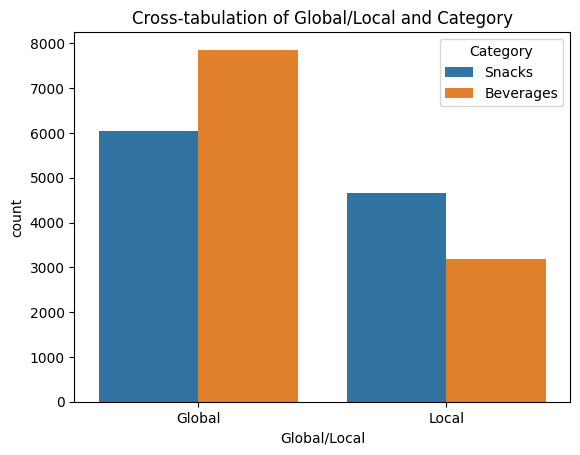

In [74]:
# Generate the cross-tabulation plot
sns.countplot(data=df_pep_new, x='Global/Local', hue='Category')
plt.title('Cross-tabulation of Global/Local and Category')
plt.show()

#cuantas vece aparece esa combinacion, vemos que la a nivel global
# hay una mayor representacion del las bebidas mientras
# que a nivel local hay un nivel mas representativo o mayor interes por los 
#snacks

In [ ]:
# Local Focus on Snacks: Most local campaigns are concentrated in 
# the "Snacks" category. This could mean that snacks are more responsive to local tastes and preferences. 🍿



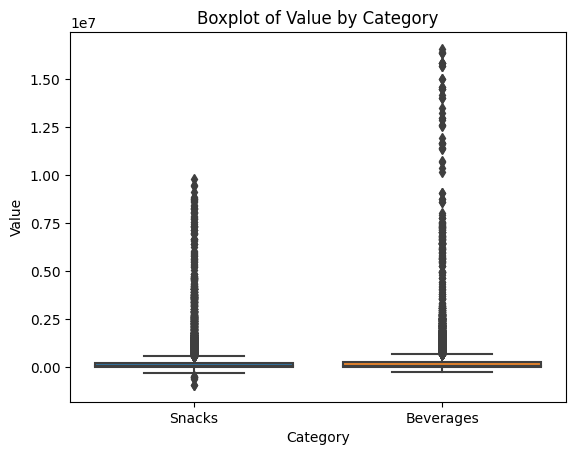

In [75]:
# Convert the 'Value' column to a numerical data type
df_pep_new['Value'] = df_pep_new['Value'].str.replace(',', '').astype(float)

# Generate the boxplot
sns.boxplot(data=df_pep_new, x='Category', y='Value')
plt.title('Boxplot of Value by Category')
plt.show()


In [ ]:
# Variabilidad Grande en "Snacks" y "Beverages": Esto puede indicar que hay campañas de marketing que están funcionando excepcionalmente
# bien para ciertos productos dentro de estas categorías, pero también hay productos que no están teniendo un buen rendimiento. 
# Aquí podrías investigar más para entender 
# cuáles son los productos estrella 🌟 y cuáles necesitan una revisión de estrategia.


# Presencia de Outliers: Estos puntos fuera de lo común pueden ser tanto una señal de alerta como una oportunidad. Podrían representar
# productos que superaron las expectativas o campañas que fracasaron estrepitosamente. En ambos casos, merecen una investigación 
# más profunda para replicar éxitos o evitar futuros fracasos.

# Tendencia Central y Sesgo: Si observamos que el valor mediano está más cercano a un extremo del 
# boxplot, esto podría indicar que la mayoría de tus campañas se agrupan en un rango de rendimiento específico.
# Por ejemplo, si el sesgo es positivo, la mayoría de tus campañas podrían estar sub-rendimiento, lo que sería una señal para revisar las estrategias

# Solving Some asks

## Which is the category which represent more incomes

In [81]:
df_pep_new.columns

Index(['Brand_Cockpit_L1', 'Brand_Cockpit_L2', 'Platform', 'Global/Local',
       'Marquet_Unit', 'Category', 'Month', 'Year', 'Data', 'Scenario',
       'Value'],
      dtype='object')

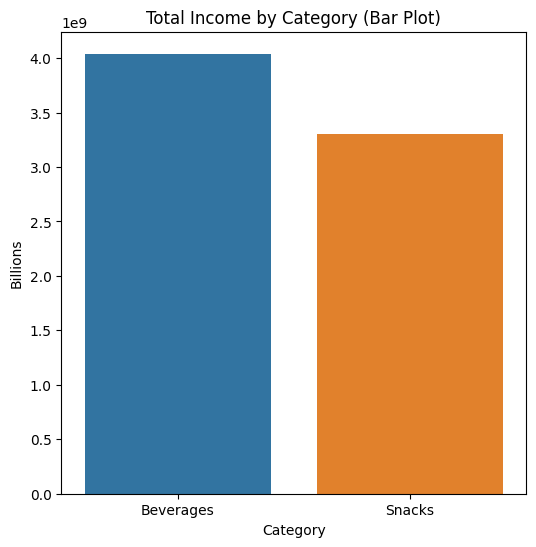

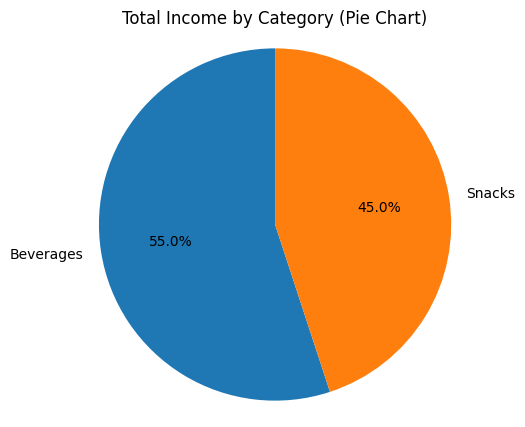

In [90]:
# Calculating the total income for each category
category_income = df_pep_new.groupby('Category')['Value'].sum().reset_index().sort_values(by='Value', ascending=False)
#print(category_income)

# Creating different plots to represent which category has more income

# # Bar Plot
plt.figure(figsize=(6, 6))
sns.barplot(x='Category', y='Value', data=category_income)
plt.title('Total Income by Category (Bar Plot)')
#plt.xticks(rotation=45)
plt.ylabel('Billions')
plt.show()

# # Pie Chart
plt.figure(figsize=(5, 5))
plt.pie(category_income['Value'], labels=category_income['Category'], autopct='%1.1f%%', startangle=90)
plt.title('Total Income by Category (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# # Print the sorted data for a textual understanding
# print("Total income for each category:")
# print(category_income)


In [93]:
df_pep_new.Scenario.unique()

array(['LY', 'Actual', 'Fcst', 'Plan'], dtype=object)

In [ ]:
C:\Users\Edgar\OneDrive\Escritorio\Data_and_ML\Data_Analyst\EDA\Caso Práctico Financial Planning Analyst - MBS Cockpit.csv